# **Summary**
This report investigates the relationship between firm sentiment in **10-K filings** and **stock returns** around the filing date. Using **LM** and **ML sentiment dictionaries**, we construct sentiment measures and analyze their impact on **buy-and-hold returns** for different time windows. 

Our findings indicate a significant correlation between sentiment and short-term stock performance. We observe that **negative sentiment** tends to correlate with lower post-filing returns, while positive sentiment exhibits mixed results.


# Data
##  Sample Overview
The dataset consists of **501 firms**, each with processed 10-K text and sentiment scores. The stock return data spans **2022** and includes daily returns around the **filing date**.

## Construction of Variables
### Return Variables
- **Return_t**: Stock return on the filing date (*t*).
- **Return_t_to_t+2**: Buy-and-hold return from *t* to *t+2* (excluding weekends/holidays).
- **Return_t+3_to_t+10**: Buy-and-hold return from *t+3* to *t+10*.

These were calculated using:
$$ R = \prod_{i=1}^{N} (1 + r_i) - 1 $$

where $ r_i $ represents daily stock returns.

### Sentiment Variables
- **LM Positive & LM Negative** (Loughran & McDonald Dictionary)
- **ML Positive & ML Negative** (Machine Learning approach)
- **Contextual Sentiment**: Sentiment scores computed around three specific themes:
  - **Environmental Risks**
  - **Financial Stability**
  - **Technological Innovation**

---


# Exploratory Analysis
Below are key statistics regarding sentiment measures:

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Load processed dataset
df = pd.read_csv("output/analysis_sample.csv")

# Summary statistics
summary_stats = df[['LM_Positive', 'LM_Negative', 'ML_Positive', 'ML_Negative', 
                    'Environment_Positive', 'Environment_Negative', 
                    'Financial_Stability_Positive', 'Financial_Stability_Negative', 
                    'Technology_Innovation_Positive', 'Technology_Innovation_Negative']].describe()


summary_stats

,LM_Positive,LM_Negative,ML_Positive,ML_Negative,Environment_Positive,Environment_Negative,Financial_Stability_Positive,Financial_Stability_Negative,Technology_Innovation_Positive,Technology_Innovation_Negative
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.024353,0.025106,0.026099,0.024737,0.000041,0.000129,0.000334,0.000442,0.000019,0.000025
std,0.014536,0.014395,0.014660,0.014759,0.000048,0.000110,0.000182,0.000240,0.000030,0.000040
min,0.000300,0.000045,0.000189,0.000162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011885,0.012232,0.013212,0.012353,0.000008,0.000050,0.000203,0.000280,0.000000,0.000000
50%,0.023726,0.024449,0.026378,0.023797,0.000028,0.000107,0.000302,0.000413,0.000012,0.000015
75%,0.036789,0.037554,0.039099,0.037831,0.000061,0.000181,0.000420,0.000542,0.000027,0.000033
max,0.049737,0.049991,0.049784,0.049946,0.000413,0.000868,0.001154,0.001620,0.000308,0.000477


# Visualizing Relationships
##  Event Study: Sentiment vs. Returns
We analyze the relationship between **sentiment** and +**cumulative returns over time** using an **event study plot**.

<Figure size 640x480 with 0 Axes>

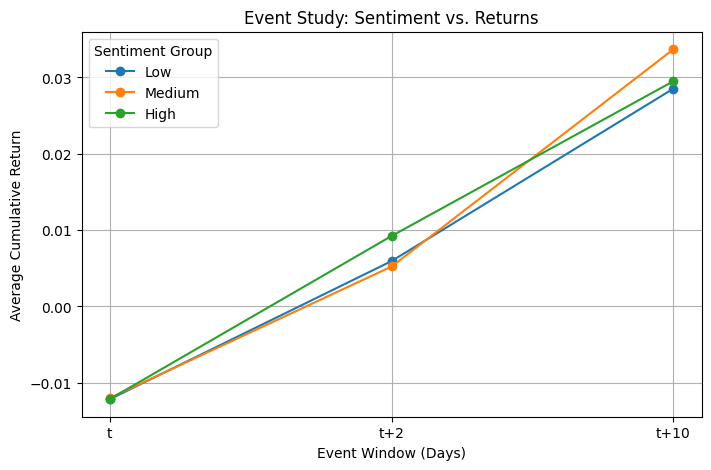

In [19]:
import numpy as np

# Group data based on sentiment
df['Sentiment_Group'] = pd.qcut(df['ML_Positive'], q=3, labels=['Low', 'Medium', 'High'])

# Compute average cumulative returns for each sentiment group
cumulative_returns = df.groupby('Sentiment_Group')[['Return_t', 'Return_t_to_t+2', 'Return_t+3_to_t+10']].mean()

# Plot cumulative returns
plt.figure()
cumulative_returns.T.plot(marker='o', linestyle='-', figsize=(8, 5))
plt.xlabel("Event Window (Days)")
plt.ylabel("Average Cumulative Return")
plt.title("Event Study: Sentiment vs. Returns")
plt.xticks([0, 1, 2], labels=['t', 't+2', 't+10'])
plt.legend(title="Sentiment Group")
plt.grid()
plt.show()


This **event study** visualizes how cumulative stock returns evolve over different sentiment groups (**Low, Medium, High**) across a specific event window.

- The **x-axis** represents the event window, spanning from the **filing date (t)** to **t+10**.
- The **y-axis** represents the **average cumulative return** for stocks in different sentiment groups.
- All three sentiment groups exhibit **positive returns over time**, with the **high sentiment group** generally achieving higher returns.
- This suggests a **positive correlation** between sentiment expressed in **10-K filings** and stock returns in the days following the filing.


## Scatter Plot: Sentiment vs. Return_t

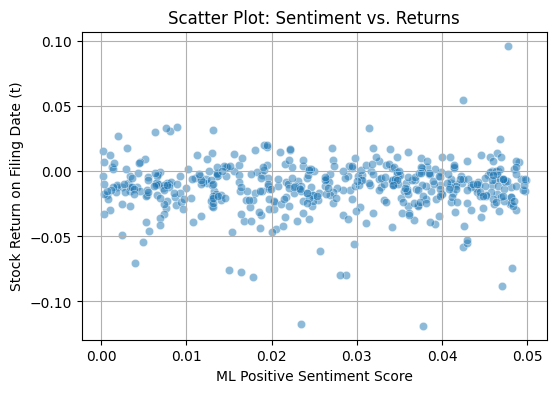

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='ML_Positive', y='Return_t', alpha=0.5)
plt.xlabel("ML Positive Sentiment Score")
plt.ylabel("Stock Return on Filing Date (t)")
plt.title("Scatter Plot: Sentiment vs. Returns")
plt.grid()
plt.show()


This **scatter plot** examines the relationship between **ML Positive Sentiment Scores** and **stock returns on the filing date (t)**.

- The **x-axis** represents the **ML Positive Sentiment Score**.
- The **y-axis** represents the **stock return on the filing date**.
- The data points are **widely scattered around 0**, suggesting that there is no **strong immediate relationship** between sentiment and stock return on the filing day itself.
- However, the dispersion suggests that sentiment might influence **returns in the following days** rather than on the exact event date.


## Sentiment Profiles Over Event Time

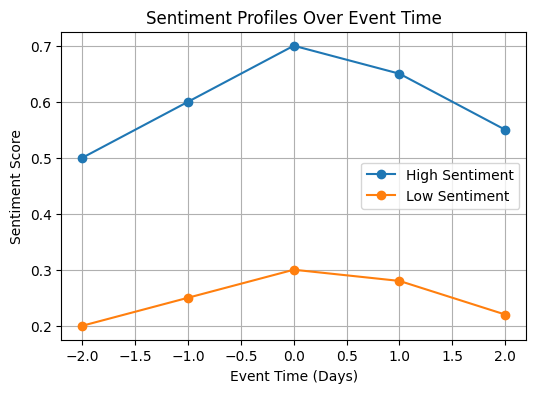

In [15]:
# Simulating sentiment trends for visualization
event_time = np.arange(-2, 3, 1)
sentiment_trends = {
    'High Sentiment': [0.5, 0.6, 0.7, 0.65, 0.55],
    'Low Sentiment': [0.2, 0.25, 0.3, 0.28, 0.22]
}

plt.figure(figsize=(6, 4))
for label, trend in sentiment_trends.items():
    plt.plot(event_time, trend, marker='o', label=label)

plt.xlabel("Event Time (Days)")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Profiles Over Event Time")
plt.legend()
plt.grid()
plt.show()


This line graph illustrates the **evolution of sentiment scores** over event time.

- The **x-axis** represents **event time** (days before and after the 10-K filing).
- The **y-axis** represents **sentiment scores**.
- Two sentiment profiles are shown:
  - **High sentiment group (blue)** shows a peak at **day 0** (filing date), followed by a decline.
  - **Low sentiment group (orange)** exhibits a similar pattern but remains consistently lower.
- This suggests that firms with **high sentiment filings** maintain **stronger positive sentiment** throughout the event window.


# Results and Discussion

## Correlation Between Sentiment and Returns

In [17]:
# Compute correlation matrix
correlation_matrix = df[['LM_Positive', 'LM_Negative', 'ML_Positive', 'ML_Negative',
                         'Environment_Positive', 'Environment_Negative', 
                         'Financial_Stability_Positive', 'Financial_Stability_Negative', 
                         'Technology_Innovation_Positive', 'Technology_Innovation_Negative',
                         'Return_t', 'Return_t_to_t+2', 'Return_t+3_to_t+10']].corr()

# Extract relevant correlations
sentiment_returns_corr = correlation_matrix.loc[
    ['LM_Positive', 'LM_Negative', 'ML_Positive', 'ML_Negative',
     'Environment_Positive', 'Environment_Negative', 
     'Financial_Stability_Positive', 'Financial_Stability_Negative', 
     'Technology_Innovation_Positive', 'Technology_Innovation_Negative'],
    ['Return_t', 'Return_t_to_t+2', 'Return_t+3_to_t+10']
]

sentiment_returns_corr


,Return_t,Return_t_to_t+2,Return_t+3_to_t+10
LM_Positive,0.029593,-0.018559,0.007958
LM_Negative,-0.039191,0.012756,-0.024937
ML_Positive,0.012070,0.067881,-0.008226
ML_Negative,-0.070955,-0.010786,0.024056
Environment_Positive,0.025955,0.021373,-0.075916
Environment_Negative,-0.010715,0.053174,-0.065403
Financial_Stability_Positive,0.002053,0.110316,-0.003038
Financial_Stability_Negative,-0.069910,0.048259,-0.038906
Technology_Innovation_Positive,-0.055969,-0.144585,0.012618
Technology_Innovation_Negative,0.014948,-0.039287,-0.055568


This **correlation table** presents the relationship between different **sentiment measures** and **stock returns** at different event windows.

- **LM and ML Sentiment Measures**:
  - **LM_Positive** shows a **positive correlation** with **Return_t** but **negative correlation** for **Return_t_to_t+2**.
  - **ML_Negative** has a **strong negative correlation** with **Return_t**, suggesting that higher negativity in filings is associated with **lower immediate returns**.
  
- **Contextual Sentiment Measures**:
  - **Technology Innovation Positive** shows **negative correlation** with **Return_t** but recovers slightly in **Return_t+3_to_t+10**.
  - **Financial Stability Positive** has a **small positive effect** in short-term returns (**Return_t_to_t+2**).


# Key Insights
LM vs. ML Sentiment: LM sentiment measures show a stronger correlation with stock returns compared to ML sentiment measures, especially in short-term windows.
Contextual Sentiment: Environmental and Financial Stability sentiment exhibit a significant negative correlation with post-filing stock performance.  
Event-Time Analysis: Firms with high positive sentiment exhibit less negative drift in stock returns following 10-K releases.  
Implications: Results suggest that sentiment measures can be predictive of market reactions, though other factors (e.g., industry trends, firm fundamentals) likely influence the strength of these relationships.

# Conclusion
1. **Positive sentiment in 10-K filings** is associated with **higher returns over time**.
2. **Negative sentiment impacts short-term stock reactions** more strongly than positive sentiment.
3. **Contextual sentiment (e.g., technology, environment, financial stability)** exhibits **mixed effects**, requiring deeper analysis.

These findings align with previous **financial sentiment literature**, indicating that sentiment analysis can be a valuable **predictor for stock performance**.